# Finding Heavy Traffic Indicators on I-94 #

This project's goal is to analyze a dataset about the westbound traffic on the I-94 Interstate highway,Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

We will explore insightful data about Interstate 94 (I-94).
It is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. Interstate 94 was  constructed in 1959, the length is 275.4 miles.

In [1]:
#import libraries
import datetime as dt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
#magic — this enables Jupyter to generate the graphs.
%matplotlib inline 
#read csv file
i_94 =  pd.read_csv('Metro_Interstate_Traffic_Volume.csv')


In [2]:
#Examine the first 5 rows of df.
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
#Examine the last 5 rows of df
i_94.tail()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
#find more information about the dataset.
i_94.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


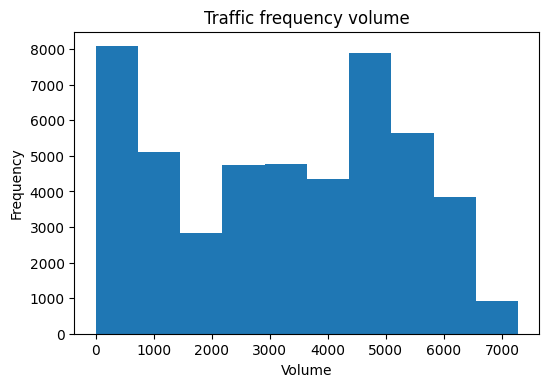

In [5]:
#Plot a histogram to examine the distribution of the traffic_volume column.
i_94['traffic_volume'].plot.hist()
plt.xlabel('Volume')
plt.title('Traffic frequency volume')
plt.show()
#The y-label "Frequency" was generated by default



In [6]:
#using Series.describe() to look up a few statistics about the traffic_volume column.
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

__Distribution Observaton__

Approximately 7280 cars past the the station twice, probably at rush hour time periods.

looking the mean of 3260 cars, and 25% (1193 cars) confirms that there time period of high and low traffic volumes possibly due to the hour of the day.

Exploring the volume by time of day may give more insight.


__comparing daytime with nighttime data__

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

This is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point.

In [7]:
# updating column as datetime objects instead of plain text

i_94['date_time'] = pd.to_datetime(i_94['date_time'])
i_94['date_time'].head(24).sort_index(ascending=True)


0    2012-10-02 09:00:00
1    2012-10-02 10:00:00
2    2012-10-02 11:00:00
3    2012-10-02 12:00:00
4    2012-10-02 13:00:00
5    2012-10-02 14:00:00
6    2012-10-02 15:00:00
7    2012-10-02 16:00:00
8    2012-10-02 17:00:00
9    2012-10-02 18:00:00
10   2012-10-02 19:00:00
11   2012-10-02 20:00:00
12   2012-10-02 21:00:00
13   2012-10-02 22:00:00
14   2012-10-02 23:00:00
15   2012-10-03 00:00:00
16   2012-10-03 01:00:00
17   2012-10-03 02:00:00
18   2012-10-03 03:00:00
19   2012-10-03 04:00:00
20   2012-10-03 05:00:00
21   2012-10-03 06:00:00
22   2012-10-03 08:00:00
23   2012-10-03 09:00:00
Name: date_time, dtype: datetime64[ns]

In [8]:
#get the hour of every instance of the date_time
i_94['date_time'].dt.hour


0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [9]:
#isolate day time data with boolean indexing 12 hrs - 6am to 6 pm 
day_data = i_94.copy()[(i_94['date_time'].dt.hour > 6) & (i_94['date_time'].dt.hour <= 18)]
print('Daytime data - 6am to 6pm :',day_data.shape)

#isolate night time data with boolean indexing 12 hrs - 6pm to 6am 
night_data = i_94.copy()[(i_94['date_time'].dt.hour > 18) | (i_94['date_time'].dt.hour < 6)]
print('Nightime data - 6pm to 6am', night_data.shape)



Daytime data - 6am to 6pm : (23877, 9)
Nightime data - 6pm to 6am (22240, 9)


__Comparing the traffic volume during the night and day.__

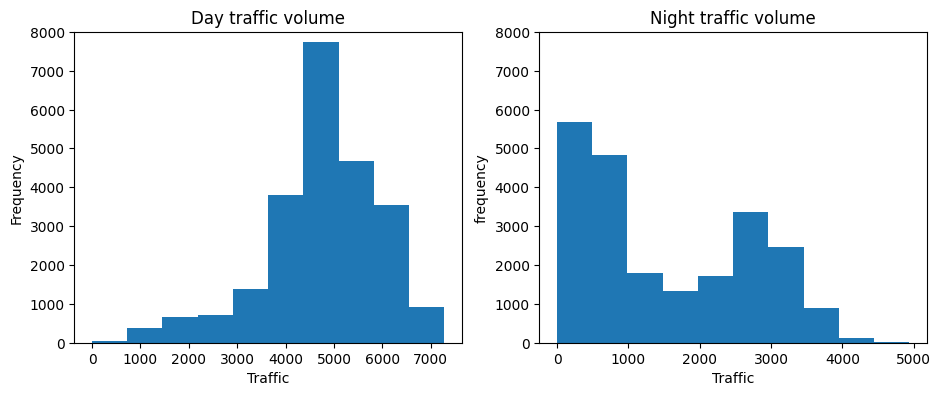

In [10]:
#Plot the histograms of traffic_volume for both day and night. 
#Organize the two histograms side-by-side on a grid chart.

plt.figure(figsize=(11, 14))#explicitly tweak the size of the figure 
# The first subplot
plt.subplot(3, 2, 1)
day_data['traffic_volume'].plot.hist()
plt.xlabel('Traffic')
plt.ylabel('Frequency')
plt.ylim(0,8000)#Set the y limits of the current axes.
plt.title('Day traffic volume')

# The second subplot
plt.subplot(3, 2, 2)
night_data['traffic_volume'].plot.hist()
plt.xlabel('Traffic')
plt.ylabel('frequency')
plt.ylim(0,8000)#Set the y limits of the current axes.
plt.title('Night traffic volume')
plt.show()#closes,plot data and shows graph



In [11]:
#view statistics for traffic_volume day data.
day_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
#view statistics for traffic_volume night data.
night_data['traffic_volume'].describe()

count    22240.000000
mean      1564.372572
std       1140.970036
min          0.000000
25%        484.000000
50%       1117.000000
75%       2693.000000
max       4939.000000
Name: traffic_volume, dtype: float64

__Results Analysis__

The daytime histogram portrays a casual distribution that is skewed left, this negative pattern dictates higher traffic volume as high as 7280 cars, the mean is 4762 cars and 75% of cars (5559) suggests there's high traffic volume throughout the day.

Night time data shows considerabely less volume with a max of 4939 cars, this is supported by the right skewed histogram. Traffic volumes decreases significantly, the night time max is only 177 cars more than the daytime's mean of 4762. Night time traffic 25% of low volume 484 cars, is considerably less than the same 25% during the day (4252 cars).



__Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward__


In [13]:
#create a new column where each value describes the month when the traffic volume measurement was taken.
day_data['month'] = day_data['date_time'].dt.month
#group the dataset by the month column with the mean as an aggregate function.
by_month_data = day_data.groupby('month').mean()
by_month_data['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

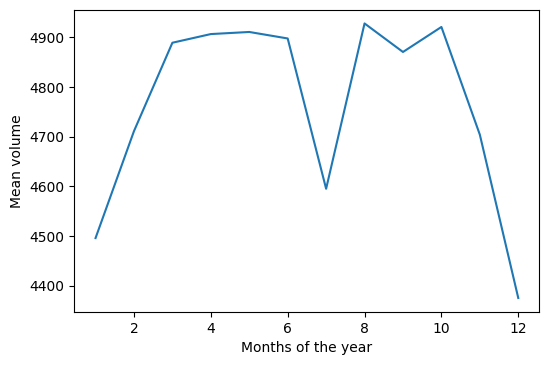

In [14]:
#Generate a line plot to visualize how traffic volume changed each week on average.
by_month_data['traffic_volume'].plot.line()
plt.xlabel("Months of the year")
plt.ylabel("Mean volume")
plt.show()

__Line Plot analysis__

Traffic is lowest in june and december, then dramatically in the following month latter month. Traffic is possibly influenced by seasonal changes.


In [15]:
# get the traffic volume averages for each day of the week

day_data['dayofweek'] = day_data['date_time'].dt.dayofweek
week_data = day_data.groupby('dayofweek').mean()
week_data['traffic_volume']  # 0 is Monday, 6 is Sunday



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

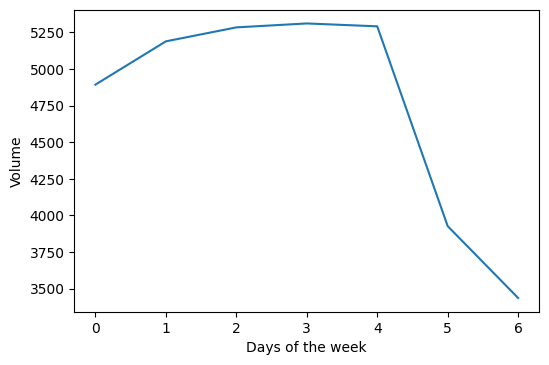

In [16]:
#Generate a line plot to visualize traffic volume changed each day on average.
week_data['traffic_volume'].plot.line()
plt.xlabel("Days of the week")
plt.ylabel("Volume")
plt.show()


__Week days analysis__

Business days are significantly higher compared to weekends, volume starts declining on fridays.


__let's investigate the time of day, The weekends, however, will drag down the average values, so we're going to look at the averages separately.__ 


In [17]:
# splitting the data based on the day type: business day or weekend.
#day data
day_data['hour'] = day_data['date_time'].dt.hour
bussiness_days = day_data.copy()[day_data['dayofweek'] <= 4] # 4 == Friday
#weekend data
weekend = day_data.copy()[day_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])


hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


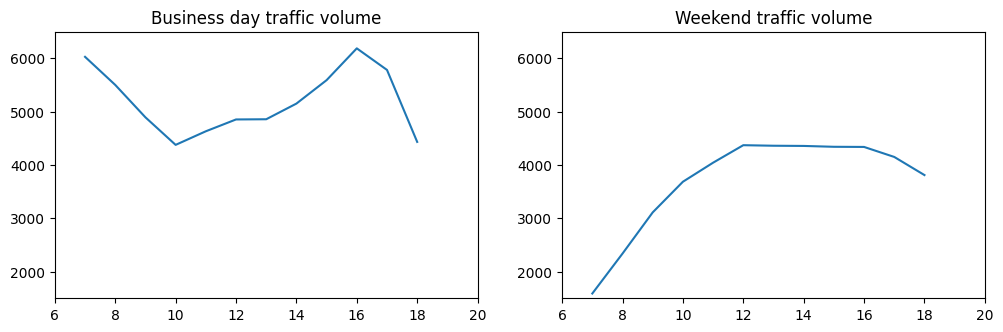

In [18]:
#Plot two line plots on a grid chart to visualize how the traffic volume changes by time of the day.

plt.figure(figsize=(12, 12))

# The first subplot
plt.subplot(3, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Business day traffic volume')
plt.xlim(6,20)#set limits of the current axis.
plt.ylim(1500,6500)


# The second subplot
plt.subplot(3, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Weekend traffic volume')
plt.xlim(6,20)
plt.ylim(1500,6500)# set limits of the current axis.
plt.show()


__Grid graph analysis__

Rush hour during business days goes as high as 6000, this volume occurs aroud 7am and 4pm, most likely due to commuting to and from work.

Weekend traffic goes as high as 4500 aroud midday and has a exponent descrease afterwards.


__Heavy traffic summary__

- Traffic is high between March and October, the weather may be a factor.

- Business days have a lot higher volume than weekends,one probality would be daily commuting.

In [19]:
#Find the correlation values between traffic_volume and the numerical weather columns.
day_data.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

__The temperature shows the strongest correlation. The other columns do not provide strong enough correlation considered as heavy traffic indicators.__

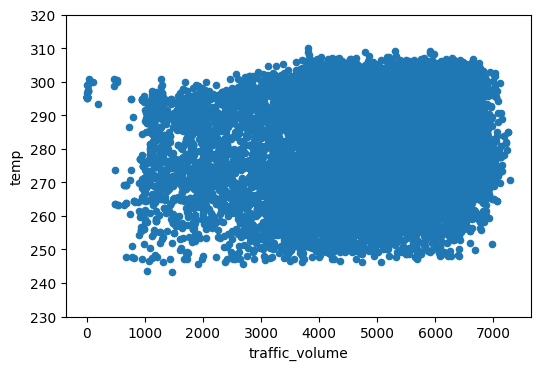

In [20]:
#Find the weather column with the strongest correlation with traffic_volume and plot a scatter plot for this weather column and traffic_volume.

day_data.plot.scatter(x ='traffic_volume',y ='temp')
plt.ylim(230,320)
plt.show()



It seems the temperature is not a reliable indicator of  heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description


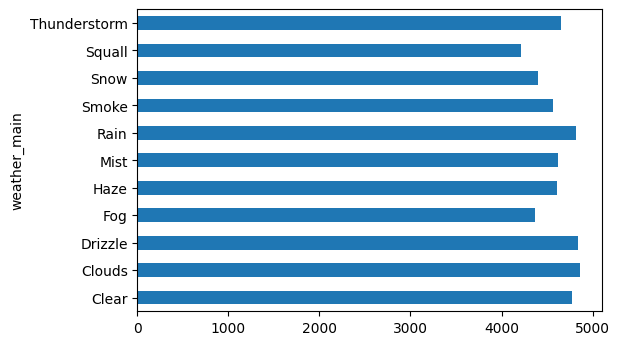

In [21]:
#calculate the average traffic volume associated with each unique value in these two columns. 
by_weather_main = day_data.groupby('weather_main').mean()
by_weather_description = day_data.groupby('weather_description').mean()

#Plot a horizontal bar plot for the traffic_volume column of by_weather_main.
by_weather_main['traffic_volume'].plot.barh()
plt.show()


__Bar plot analysis__

Despite weather conditions, traffic volume exeeds 4000, but does not exeed 5000 cars.

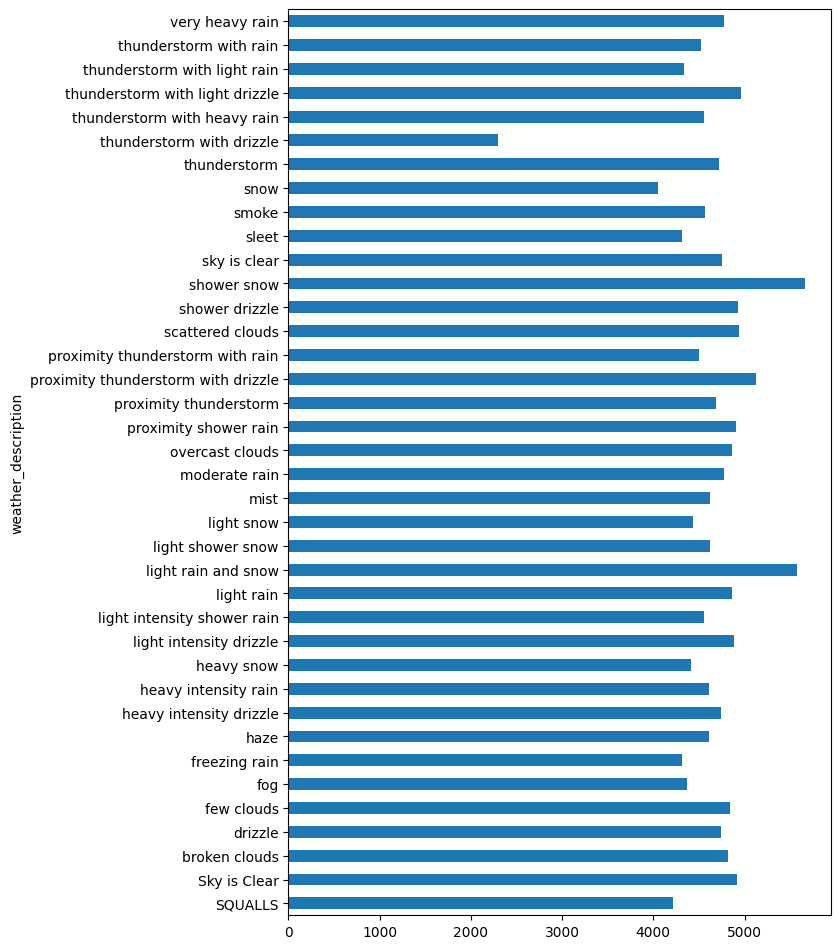

In [22]:
#Plot horizontal bar plot for the traffic_volume column of by_weather_description
by_weather_description['traffic_volume'].plot.barh(figsize=(7,12))#figsize used to adjust size of graph.
plt.show()

__Bar plot analysis__

Taffic volume exeeds 5000 cars when there is light rain and snow, shower snow and proximity thunderstom with drizzle.

It isn't transparent why the traffic volume is that high during not so favorable weather conditions, no outliers found.


## Conclusion

The results of this analysis on I94 traffic westbound to the station procured a 2 indicators of high traffic volumes:

__Time indicators__

- Warm months
- Business days
- Business days rush hour. 

Traffic is high between March and October. Business days have a lot higher volume than weekends, one probality would be daily commuting. Approximately 7280 cars past the the station twice (7am & 4pm), probably at rush hour time periods.

__Weather indicators__

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

Traffic volume exeeds 5000 cars when there is light rain and snow, shower snow and proximity thunderstom with drizzle.